In [ ]:
######################################################################################################
# ALUNO : Luiz Felipe Dos Santos Alves
# MATRÍCULA : 2018094852
# TURMA : TF
######################################################################################################

#===================================================================
#                        IMPORTANTE
#  Por favor salvem o Jupyter Notebook como ATV07-FulanoDeTal.ipynb, 
#  onde FulanoDeTal é o seu nome completo e postem em nossa sala de
#  aula no MS Teams até 23:59hs (17/09/2020) !


In [ ]:
#  Para a funçao y = sen(2x)*exp(-1.0*x^2), execute as seguintes atividades:
#  1) gere um conjunto de dados x,y, incluindo ruido aleatorio em y e assegurando que os valores de x
#  nao estao regularmente espaçados;
#  2) salve os dados em um arquivo de texto;
#  3) leia os dados x, y do arquivo criado;
#  4) faça um gráfico dos dados;
#  5) faça os processos de interpolaçao e suavizacao;
#  6) calcule as derivadas de ordem 1 e ordem 2;
#  7) faça um gráfico da funçao suavizada/interpolada e de suas derivadas;
#  8) encontre pontos de máximo e mínimo;
#  7) faça a integracao numérica da funçao dentro de intervalo de sua escolha;

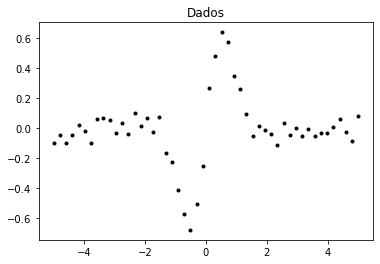

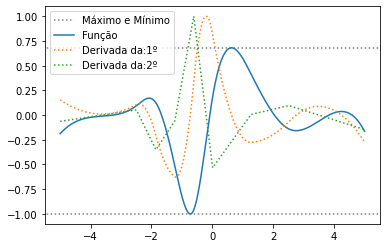

Integral pelo método de Simpson =  -0.10861460129094225


In [221]:
import numpy as np 
import matplotlib.pyplot as plt

def minmax(lista):

    if(len(lista) == 0):
        raise ValueError('Cannot find the maximum of an empty list.')

    if len(lista) == 1:
        return (lista[0], lista[0])

    _min, _max = minmax(lista[1:])

    if lista[0] < _min:
        _min = lista[0]

    if lista[0] > _max:
        _max = lista[0]

    return (_min, _max)

def fun1(x):
        
    return np.sin(2*x)*np.exp(-1*(x**2))
x = np.linspace(-5,5,50)
y= fun1(x)
ruido = 0.05*np.random.normal(size=y.size)
y= y + ruido 
file = open('dados.txt',"w")

for linha in range(len(y)):
    file.write(str(x[linha]) + ' ' + str(y[linha]))
    file.write('\n')
file.close()
dados = np.loadtxt("dados.txt")
ydados, xdados = dados[:,1], dados[:,0]
plt.plot(xdados, ydados, "k." )
plt.title(label = 'Dados')
plt.show()
#suavizção:
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

x_new = np.linspace(min(xdados),max(xdados),500)
itp = interp1d(xdados, ydados, kind = 'cubic')
y_smooth = UnivariateSpline(x_new,itp(x_new))
y_smooth.set_smoothing_factor(5)

#derivada :
import numdifftools as nd

for i in range(3):
    df = nd.Derivative(y_smooth, n=i)
    y = df(x_new)
    n= str(i)
    p= 'Derivada da:'
    texto = p + n + 'º'
    if i == 0:
        texto = 'Função'
        lista= list()
        lista= y/np.abs(y).max()
        ymax, ymin  = minmax(lista)
        #print(ymax,ymin)
        plt.axhline(y=ymax,xmin=-5, xmax= 5, ls =':',color="grey", label = "Máximo e Mínimo")
        plt.axhline(y=ymin,xmin=-5, xmax= 5, ls =':',color="grey", )
        plt.plot(x_new, y/np.abs(y).max(),label=texto)
        continue
    h = plt.plot(x_new, y/np.abs(y).max(),label = texto, ls= ":")
    plt.legend(loc = 'best')
plt.show()

#integral:
from scipy.integrate import simps

area = simps(y_smooth(x_new),x_new)
print ("Integral pelo método de Simpson = ", area)

In [219]:
👁👄👁

In [91]:
#  Para a funçao y = tanh(x)*sen(x), execute as seguintes atividades:
#  1) gere um conjunto de dados x,y, incluindo ruido aleatorio em y e assegurando que os valores de x
#  nao estao regularmente espaçados;
#  2) salve os dados em um arquivo de texto;
#  3) leia os dados x, y do arquivo criado;
#  4) faça um gráfico dos dados;
#  5) faça os processos de interpolaçao e suavizacao;
#  6) calcule as derivadas de ordem 1 e ordem 2;
#  7) faça um gráfico da funçao suavizada/interpolada e de suas derivadas;
#  8) encontre pontos de máximo e mínimo;
#  7) faça a integracao numérica da funçao dentro de intervalo de sua escolha;

In [208]:

def fun1(x):
        
    return np.tanh(x)*np.sin(x)
x = np.linspace(-5,5,50)
y= fun1(x)
ruido = 0.1*np.random.normal(size=y.size)
y= y + ruido 
file = open('dados1.txt',"w")

for linha in range(len(y)):
    file.write(str(x[linha]) + ' ' + str(y[linha]))
    file.write('\n')
file.close()
dados = np.loadtxt("dados1.txt")
ydados, xdados = dados[:,1], dados[:,0]
plt.plot(xdados, ydados, "k." )
plt.title(label = 'Dados')
plt.show()
#suavizção:

x_new = np.linspace(min(xdados),max(xdados),500)
itp = interp1d(xdados, ydados, kind = 'cubic')
y_smooth = UnivariateSpline(x_new,itp(x_new))
y_smooth.set_smoothing_factor(5)

#derivada :

for i in range(3):
    df = nd.Derivative(y_smooth, n=i)
    y = df(x_new)
    n= str(i)
    p= 'Derivada da:'
    texto = p + n + 'º'
    if i == 0:
        texto = 'Função'
        lista= list()
        lista= y/np.abs(y).max()
        ymax, ymin  = minmax(lista)
        #print(ymax,ymin)
        plt.axhline(y=ymax,xmin=-5, xmax= 5, ls =':',color="grey", label = "Máximo e Mínimo")
        plt.axhline(y=ymin,xmin=-5, xmax= 5, ls =':',color="grey", )
        plt.plot(x_new, y/np.abs(y).max(),label=texto)
        continue
    h = plt.plot(x_new, y/np.abs(y).max(),label = texto, ls= ":")
    plt.legend(loc = 'best')
plt.show()

#integral:

area = simps(y_smooth(x_new),x_new)
print ("Integral pelo método de Simpson = ", area)

TypeError: string indices must be integers

In [ ]:
#  Para a funçao y = sqrt(x)*cosh(2*x), execute as seguintes atividades:
#  1) gere um conjunto de dados x,y, incluindo ruido aleatorio em y e assegurando que os valores de x
#  nao estao regularmente espaçados;
#  2) salve os dados em um arquivo de texto;
#  3) leia os dados x, y do arquivo criado;
#  4) faça um gráfico dos dados;
#  5) faça os processos de interpolaçao e suavizacao;
#  6) calcule as derivadas de ordem 1 e ordem 2;
#  7) faça um gráfico da funçao suavizada/interpolada e de suas derivadas;
#  8) encontre pontos de máximo e mínimo;
#  7) faça a integracao numérica da funçao dentro de intervalo de sua escolha;

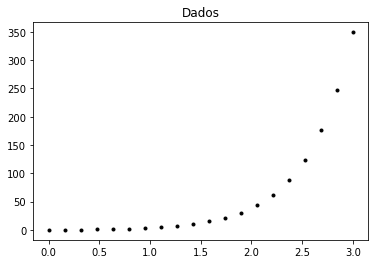

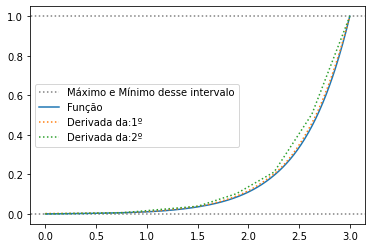

Integral pelo método de Simpson =  158.44575461014105


In [220]:
def fun1(x):
        
    return np.sqrt(x)*np.cosh(2*x)
x = np.linspace(0,3,20)
y= fun1(x)
ruido = 0.1*np.random.normal(size=y.size)
y= y + ruido 
file = open('dados2.txt',"w")

for linha in range(len(y)):
    file.write(str(x[linha]) + ' ' + str(y[linha]))
    file.write('\n')
file.close()
dados = np.loadtxt("dados2.txt")
ydados, xdados = dados[:,1], dados[:,0]
plt.plot(xdados, ydados, "k." )
plt.title(label = 'Dados')
plt.show()
#suavizção:

x_new = np.linspace(min(xdados),max(xdados),500)
itp = interp1d(xdados, ydados, kind = 'cubic')
y_smooth = UnivariateSpline(x_new,itp(x_new))
y_smooth.set_smoothing_factor(5)

#derivada :


for i in range(3):
    df = nd.Derivative(y_smooth, n=i)
    y = df(x_new)
    n= str(i)
    p= 'Derivada da:'
    texto = p + n + 'º'
    if i == 0:
        texto = 'Função'
        lista= list()
        lista= y/np.abs(y).max()
        ymax, ymin  = minmax(lista)
        #print(ymax,ymin)
        plt.axhline(y=ymax,xmin=-5, xmax= 5, ls =':',color="grey", label = "Máximo e Mínimo desse intervalo")
        plt.axhline(y=ymin,xmin=-5, xmax= 5, ls =':',color="grey", )
        plt.plot(x_new, y/np.abs(y).max(),label=texto)
        continue
    h = plt.plot(x_new, y/np.abs(y).max(),label = texto, ls= ":")
    plt.legend(loc = 'best')
plt.show()

#integral:


area = simps(y_smooth(x_new),x_new)
print ("Integral pelo método de Simpson = ", area)